In [1]:
import pandas as pd # type: ignore

transkip = pd.read_csv('dataset/transkip.csv')
lulusan = pd.read_csv('dataset/ms_lulusan.csv')

df_transkip = pd.DataFrame( transkip )  
df_lulusan = pd.DataFrame( lulusan )

df_lulusan

,nim,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai
0,15416226201001,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
1,15416226201002,26201,Pujian,2019-08-31,2015-09-06,0,0,1996,1
2,15416226201003,26201,Pujian,2019-08-31,2015-09-06,0,1,1984,1
3,15416226201004,26201,Pujian,2019-08-31,2015-09-06,0,1,1996,1
4,15416226201005,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
...,...,...,...,...,...,...,...,...,...
4537,20416261201301,61201,Pujian,2022-10-10,2020-09-09,0,0,1997,0
4538,20416262201064,62201,Pujian,2023-08-31,2020-09-09,0,0,1994,0
4539,20416273201158,73201,Sangat Memuaskan,2024-07-11,2020-09-09,0,1,0,0
4540,20416274201164,74201,Pujian,2022-08-22,2020-09-09,0,0,1997,0


##### 1. Integrasi dan Transformation data

###### - Mencari nilai IPS semester tiap mahasiswa

In [2]:
def hitungIPS( df ) :
    # Kelompokkan data berdasarkan NIM dan semester
    grouped = df.groupby(['nim', 'semester'])

    # Buat list untuk menyimpan hasil perhitungan IPS
    ips_data = []

    for ( nim, semester ), group in grouped :
        # Hitung nilai total (jumlah perkalian nilai dengan sks) dan jumlah total sks
        nilai_total = ( group['nilai_grade'] * group['sks_mk'] ).sum()
        total_sks = group['sks_mk'].sum()

        # Hitung IPS
        if total_sks > 0 :
            ips = round( nilai_total / total_sks, 2 )
        else :
            ips = 0

        # Tambahkan data IPS ke list
        ips_data.append( {'nim': nim, 'semester': semester, 'ips': ips} )

    # Buat DataFrame dari list data IPS
    df_ips = pd.DataFrame( ips_data )

    return df_ips

# Hitung IPS untuk data transkip nilai
ips_traskip = hitungIPS( df_transkip )
ips_traskip

,nim,semester,ips
0,15416226201001,1,3.20
1,15416226201001,2,3.40
2,15416226201001,3,2.93
3,15416226201001,4,2.99
4,15416226201001,5,3.33
...,...,...,...
36223,20416286206132,4,3.76
36224,20416286206132,5,3.67
36225,20416286206132,6,3.79
36226,20416286206132,7,3.97


###### - Menggabungkan nilai IPS dengan dataset ms_lulusan

In [3]:
df_data = pd.merge( ips_traskip, df_lulusan, on='nim', how='left' )
df_data

,nim,semester,ips,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai
0,15416226201001,1,3.20,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
1,15416226201001,2,3.40,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
2,15416226201001,3,2.93,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
3,15416226201001,4,2.99,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
4,15416226201001,5,3.33,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
...,...,...,...,...,...,...,...,...,...,...,...
36223,20416286206132,4,3.76,86206,Pujian,2023-08-29,2020-09-09,0,0,1998,1
36224,20416286206132,5,3.67,86206,Pujian,2023-08-29,2020-09-09,0,0,1998,1
36225,20416286206132,6,3.79,86206,Pujian,2023-08-29,2020-09-09,0,0,1998,1
36226,20416286206132,7,3.97,86206,Pujian,2023-08-29,2020-09-09,0,0,1998,1


###### - Menambahkan durasi hasil studi

In [4]:
def hitung_durasi_studi(df):
    
    # Konversi kolom tanggal_lulus dan tgl_masuk kedalam tipe data datetime
    df['tanggal_lulus'] = pd.to_datetime(df['tanggal_lulus'])
    df['tgl_masuk'] = pd.to_datetime(df['tgl_masuk'])

    # Kelompokkan data berdasarkan NIM
    grouped = df.groupby('nim')

    durasi_studi_data = []
    
    for (nim), group in grouped:
        # Hitung druasi studi
        durasi_studi = (group['tanggal_lulus'] - group['tgl_masuk']).sum()
        # Ambil tahun, bulan, dan hari dari objek timedelta
        durasi_studi_month = durasi_studi.days // 365
        
        # Tambahkan data IPS ke list
        durasi_studi_str = f"{durasi_studi_month}"
        durasi_studi_data.append({'nim': nim, 'lama_kuliah(tahun)': durasi_studi_str})
    
    # Buat DataFrame dari list data IPS
    df_durasi_studi = pd.DataFrame(durasi_studi_data)
    return df_durasi_studi

# Hitung IPS untuk data transkrip nilai
durasi_studi = hitung_durasi_studi(df_lulusan)
durasi_studi

,nim,lama_kuliah(tahun)
0,15416226201001,3
1,15416226201002,3
2,15416226201003,3
3,15416226201004,3
4,15416226201005,3
...,...,...
4537,20416261201301,2
4538,20416262201064,2
4539,20416273201158,3
4540,20416274201164,1


In [5]:
df_data_normalisasi = pd.merge( df_data, durasi_studi, on='nim', how='left' )

df_data_normalisasi

,nim,semester,ips,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai,lama_kuliah(tahun)
0,15416226201001,1,3.20,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,3
1,15416226201001,2,3.40,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,3
2,15416226201001,3,2.93,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,3
3,15416226201001,4,2.99,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,3
4,15416226201001,5,3.33,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
36223,20416286206132,4,3.76,86206,Pujian,2023-08-29,2020-09-09,0,0,1998,1,2
36224,20416286206132,5,3.67,86206,Pujian,2023-08-29,2020-09-09,0,0,1998,1,2
36225,20416286206132,6,3.79,86206,Pujian,2023-08-29,2020-09-09,0,0,1998,1,2
36226,20416286206132,7,3.97,86206,Pujian,2023-08-29,2020-09-09,0,0,1998,1,2


###### - Menghilangkan mahasiswa pindahan

In [6]:
df_data_normalisasi.drop(df_data_normalisasi[df_data_normalisasi['status_masuk'] == 1].index, inplace=True)

df_data_normalisasi

,nim,semester,ips,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai,lama_kuliah(tahun)
0,15416226201001,1,3.20,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,3
1,15416226201001,2,3.40,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,3
2,15416226201001,3,2.93,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,3
3,15416226201001,4,2.99,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,3
4,15416226201001,5,3.33,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
36223,20416286206132,4,3.76,86206,Pujian,2023-08-29,2020-09-09,0,0,1998,1,2
36224,20416286206132,5,3.67,86206,Pujian,2023-08-29,2020-09-09,0,0,1998,1,2
36225,20416286206132,6,3.79,86206,Pujian,2023-08-29,2020-09-09,0,0,1998,1,2
36226,20416286206132,7,3.97,86206,Pujian,2023-08-29,2020-09-09,0,0,1998,1,2


###### - Standarisasi format tanggal dan jenis kelamin

In [7]:
df_data_normalisasi['jenis_kelamin'] = df_data_normalisasi['jenis_kelamin'].replace( { 0: 'laki-laki', 1: 'perempuan' } )

df_data_normalisasi

,nim,semester,ips,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai,lama_kuliah(tahun)
0,15416226201001,1,3.20,26201,Pujian,2019-08-31,2015-09-06,0,perempuan,1994,1,3
1,15416226201001,2,3.40,26201,Pujian,2019-08-31,2015-09-06,0,perempuan,1994,1,3
2,15416226201001,3,2.93,26201,Pujian,2019-08-31,2015-09-06,0,perempuan,1994,1,3
3,15416226201001,4,2.99,26201,Pujian,2019-08-31,2015-09-06,0,perempuan,1994,1,3
4,15416226201001,5,3.33,26201,Pujian,2019-08-31,2015-09-06,0,perempuan,1994,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
36223,20416286206132,4,3.76,86206,Pujian,2023-08-29,2020-09-09,0,laki-laki,1998,1,2
36224,20416286206132,5,3.67,86206,Pujian,2023-08-29,2020-09-09,0,laki-laki,1998,1,2
36225,20416286206132,6,3.79,86206,Pujian,2023-08-29,2020-09-09,0,laki-laki,1998,1,2
36226,20416286206132,7,3.97,86206,Pujian,2023-08-29,2020-09-09,0,laki-laki,1998,1,2


###### Mencari lama waktu menempuh perkuliahan, sesuai dengan peraturan mentri

In [19]:
def PrediksiLulusTepatWaktu(df):
    # Pastikan kolom 'lama_kuliah(tahun)' adalah numerik
    df['lama_kuliah(tahun)'] = pd.to_numeric(df['lama_kuliah(tahun)'])

    # Grupkan berdasarkan 'nim'
    grouped = df.groupby('nim')

    lulus_tepat_waktu_data = []

    # Iterasi melalui setiap grup
    for nim, group in grouped:
        # Ambil nilai pertama dari kolom 'lama_kuliah(tahun)' dalam grup
        lama_kuliah = group['lama_kuliah(tahun)'].iloc[0]

        if lama_kuliah < 5:
            lulus_tepat_waktu_data.append({'nim': nim, 'lulus_tepat_waktu': 'Ya'})
        else:
            lulus_tepat_waktu_data.append({'nim': nim, 'lulus_tepat_waktu': 'Tidak'})

    # Konversi list hasil ke DataFrame
    df_lulus_tepat_waktu = pd.DataFrame(lulus_tepat_waktu_data)

    return df_lulus_tepat_waktu

# Contoh penggunaan fungsi
lulus_tepat_waktu = PrediksiLulusTepatWaktu(df_data_normalisasi)
print(lulus_tepat_waktu)


                 nim lulus_tepat_waktu
0     15416226201001                Ya
1     15416226201002                Ya
2     15416226201003                Ya
3     15416226201004                Ya
4     15416226201005                Ya
...              ...               ...
4514  19416287205041                Ya
4515  20416261201301                Ya
4516  20416262201064                Ya
4517  20416274201164                Ya
4518  20416286206132                Ya

[4519 rows x 2 columns]


In [20]:
df_merge_normalisasi = pd.merge( df_data_normalisasi, lulus_tepat_waktu, on='nim', how='left' )
df_merge_normalisasi

,nim,semester,ips,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai,lama_kuliah(tahun),lulus_tepat_waktu
0,15416226201001,1,3.20,26201,Pujian,2019-08-31,2015-09-06,0,perempuan,1994,1,3,Ya
1,15416226201001,2,3.40,26201,Pujian,2019-08-31,2015-09-06,0,perempuan,1994,1,3,Ya
2,15416226201001,3,2.93,26201,Pujian,2019-08-31,2015-09-06,0,perempuan,1994,1,3,Ya
3,15416226201001,4,2.99,26201,Pujian,2019-08-31,2015-09-06,0,perempuan,1994,1,3,Ya
4,15416226201001,5,3.33,26201,Pujian,2019-08-31,2015-09-06,0,perempuan,1994,1,3,Ya
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,20416286206132,4,3.76,86206,Pujian,2023-08-29,2020-09-09,0,laki-laki,1998,1,2,Ya
36164,20416286206132,5,3.67,86206,Pujian,2023-08-29,2020-09-09,0,laki-laki,1998,1,2,Ya
36165,20416286206132,6,3.79,86206,Pujian,2023-08-29,2020-09-09,0,laki-laki,1998,1,2,Ya
36166,20416286206132,7,3.97,86206,Pujian,2023-08-29,2020-09-09,0,laki-laki,1998,1,2,Ya


##### 1. Analisis 

###### Data Cleaning : Buat analisis dan skenario untuk membersihkan data seperti kesalahan angka pada tahun lahir, status semester, dan data anomali lainya. Jelaskan mana data noise dan data outlier.

In [10]:
# Mengatasi kesalahan status semester
invalid_status_semester = df_merge_normalisasi[(df_merge_normalisasi['semester'] < 1) | (df_merge_normalisasi['semester'] > 14)]
print("Data dengan status semester tidak valid:")
invalid_status_semester

Data dengan status semester tidak valid:


,nim,semester,ips,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai,lama_kuliah(tahun),lulus_tepat_waktu
15258,17416255201193,0,3.00,55201,Sangat Memuaskan,2020-09-17,2017-09-10,0,perempuan,1996,0,3,Ya
16923,17416261201371,0,2.75,61201,Memuaskan,2021-12-08,2017-09-10,0,perempuan,1996,1,4,Ya
17180,17416261201437,0,3.00,61201,Sangat Memuaskan,2021-08-31,2017-09-10,0,laki-laki,1984,0,3,Ya
17309,17416261201501,0,3.42,61201,Sangat Memuaskan,2023-08-31,2017-09-10,0,perempuan,1996,1,5,Tidak
18301,17416262201210,0,3.64,62201,Sangat Memuaskan,2023-10-12,2017-09-10,0,laki-laki,1996,0,6,Tidak
18869,17416273201156,0,2.93,73201,Sangat Memuaskan,2023-07-28,2017-09-10,0,laki-laki,1998,1,5,Tidak
18886,17416273201158,0,3.00,73201,Sangat Memuaskan,2022-07-08,2017-09-10,0,laki-laki,1997,0,4,Ya
20351,17416287205054,0,2.80,87205,Sangat Memuaskan,2023-02-28,2017-09-10,0,perempuan,1998,1,5,Tidak
23072,18416257201063,0,3.00,57201,Sangat Memuaskan,2020-09-17,2018-09-03,0,perempuan,1995,1,2,Ya
23081,18416257201065,0,4.00,57201,Sangat Memuaskan,2020-09-17,2018-09-03,0,perempuan,1993,1,2,Ya


In [22]:
# Hapus data yang tidak valid
df_merge_normalisasi[(df_merge_normalisasi['semester'] >= 1) & (df_merge_normalisasi['semester'] <= 14)]

,nim,semester,ips,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai,lama_kuliah(tahun),lulus_tepat_waktu
0,15416226201001,1,3.20,26201,Pujian,2019-08-31,2015-09-06,0,perempuan,1994,bekerja,3,Ya
1,15416226201001,2,3.40,26201,Pujian,2019-08-31,2015-09-06,0,perempuan,1994,bekerja,3,Ya
2,15416226201001,3,2.93,26201,Pujian,2019-08-31,2015-09-06,0,perempuan,1994,bekerja,3,Ya
3,15416226201001,4,2.99,26201,Pujian,2019-08-31,2015-09-06,0,perempuan,1994,bekerja,3,Ya
4,15416226201001,5,3.33,26201,Pujian,2019-08-31,2015-09-06,0,perempuan,1994,bekerja,3,Ya
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,20416286206132,4,3.76,86206,Pujian,2023-08-29,2020-09-09,0,laki-laki,1998,bekerja,2,Ya
36164,20416286206132,5,3.67,86206,Pujian,2023-08-29,2020-09-09,0,laki-laki,1998,bekerja,2,Ya
36165,20416286206132,6,3.79,86206,Pujian,2023-08-29,2020-09-09,0,laki-laki,1998,bekerja,2,Ya
36166,20416286206132,7,3.97,86206,Pujian,2023-08-29,2020-09-09,0,laki-laki,1998,bekerja,2,Ya


In [23]:
# Menghubah standarisasi format status pegawai
df_merge_normalisasi['status_pegawai'] = df_merge_normalisasi['status_pegawai'].replace( { 0: 'tidak bekerja', 1: 'bekerja' } )
df_merge_normalisasi

,nim,semester,ips,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai,lama_kuliah(tahun),lulus_tepat_waktu
0,15416226201001,1,3.20,26201,Pujian,2019-08-31,2015-09-06,0,perempuan,1994,bekerja,3,Ya
1,15416226201001,2,3.40,26201,Pujian,2019-08-31,2015-09-06,0,perempuan,1994,bekerja,3,Ya
2,15416226201001,3,2.93,26201,Pujian,2019-08-31,2015-09-06,0,perempuan,1994,bekerja,3,Ya
3,15416226201001,4,2.99,26201,Pujian,2019-08-31,2015-09-06,0,perempuan,1994,bekerja,3,Ya
4,15416226201001,5,3.33,26201,Pujian,2019-08-31,2015-09-06,0,perempuan,1994,bekerja,3,Ya
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,20416286206132,4,3.76,86206,Pujian,2023-08-29,2020-09-09,0,laki-laki,1998,bekerja,2,Ya
36164,20416286206132,5,3.67,86206,Pujian,2023-08-29,2020-09-09,0,laki-laki,1998,bekerja,2,Ya
36165,20416286206132,6,3.79,86206,Pujian,2023-08-29,2020-09-09,0,laki-laki,1998,bekerja,2,Ya
36166,20416286206132,7,3.97,86206,Pujian,2023-08-29,2020-09-09,0,laki-laki,1998,bekerja,2,Ya


###### Missing Values : Buat analisis apakah ada data yang kosong dan bagaimana cara menangani data tersebut.

In [24]:
df_merge_normalisasi.isnull().sum()

nim                   0
semester              0
ips                   0
prodi                 0
predikat              0
tanggal_lulus         0
tgl_masuk             0
status_masuk          0
jenis_kelamin         0
tahun_lahir           0
status_pegawai        0
lama_kuliah(tahun)    0
lulus_tepat_waktu     0
dtype: int64

###### Cek apakah ada data yang duplikat.

In [25]:
df_duplicated = df_merge_normalisasi.duplicated( subset=['nim'] )
df_duplicated

0        False
1         True
2         True
3         True
4         True
         ...  
36163     True
36164     True
36165     True
36166     True
36167     True
Length: 36168, dtype: bool

###### Petterns : identifikasi faktor-faktor yang paling berpengaruh terhadap kelulusan tepatwaktu mahasiswa. temukan pola asosiasi antara variabel-variabel yang ada dengan kelulusan tepat waktu. Cari pola atau tren yang paling mempengaruhi dengan lulusan tepat waktu atau lama masa studi. Cari lah kombinasi tren yang paling mempengaruhi.

In [26]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
from sklearn.preprocessing import LabelEncoder # type: ignore
from mlxtend.frequent_patterns import apriori, association_rules # type: ignore

# Mengonversi kolom 'predikat' ke nilai numerik menggunakan Label Encoding
le = LabelEncoder()
df_merge_normalisasi['predikat'] = le.fit_transform(df_merge_normalisasi['predikat'])

# Mengecek jenis data setiap kolom
print(df_merge_normalisasi.dtypes)

# Menghitung korelasi pada kolom numerik saja
correlation_matrix = df_merge_normalisasi.select_dtypes(include=[np.number]).corr()
print(correlation_matrix)

# Menemukan pola asosiasi dengan Apriori
# Mengonversi data ke dalam bentuk boolean untuk Apriori
df_merge_normalisasi['lulus_tepat_waktu'] = df_merge_normalisasi['lama_kuliah(tahun)'] <= 8

# Mengonversi data kategori lainnya menjadi boolean atau mengabaikannya jika tidak cocok
data_bool = df_merge_normalisasi[['ips', 'predikat', 'tahun_lahir', 'status_pegawai', 'lulus_tepat_waktu']].astype(bool)

# Menjalankan algoritma Apriori
frequent_itemsets = apriori(data_bool, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules)

nim                     int64
semester                int64
ips                   float64
prodi                   int64
predikat                int32
tanggal_lulus          object
tgl_masuk              object
status_masuk            int64
jenis_kelamin          object
tahun_lahir             int64
status_pegawai         object
lama_kuliah(tahun)      int64
lulus_tepat_waktu      object
dtype: object
                         nim  semester       ips     prodi  predikat  \
nim                 1.000000 -0.000960  0.320133 -0.001990 -0.016327   
semester           -0.000960  1.000000  0.367180  0.000149 -0.000643   
ips                 0.320133  0.367180  1.000000  0.225544 -0.249577   
prodi              -0.001990  0.000149  0.225544  1.000000 -0.142007   
predikat           -0.016327 -0.000643 -0.249577 -0.142007  1.000000   
status_masuk             NaN       NaN       NaN       NaN       NaN   
tahun_lahir         0.425968  0.000622  0.102586  0.014053  0.015606   
lama_kuliah(tahun) -

##### 5. Visualisasi : Gunakan grafik atau methode visualisasi lainya untuk mempermudah pengambarang Petterns atau pola, gabungan variabel yang menggambarkan pola mahasiswa lulus tepat waktu.

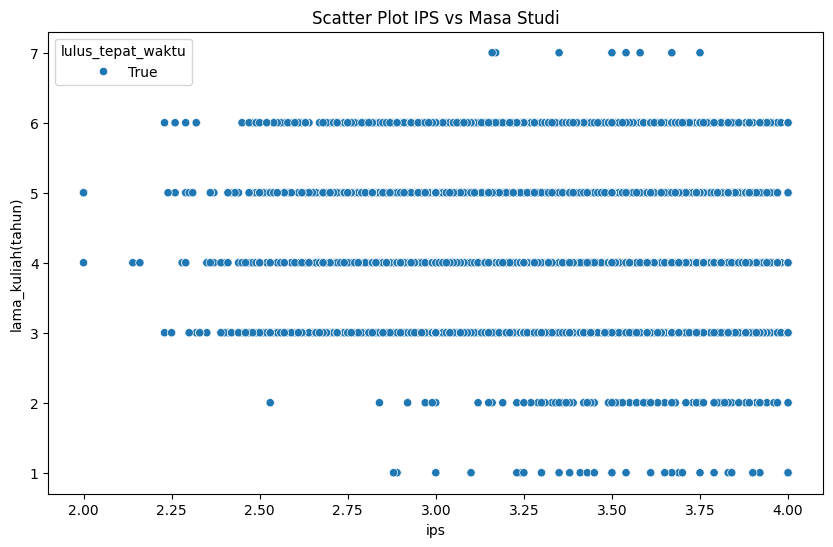

In [29]:
# 5. Visualisasi
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

# Scatter plot IPK vs Masa Studi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ips', y='lama_kuliah(tahun)', hue='lulus_tepat_waktu', data=df_merge_normalisasi)
plt.title('Scatter Plot IPS vs Masa Studi')
plt.show()


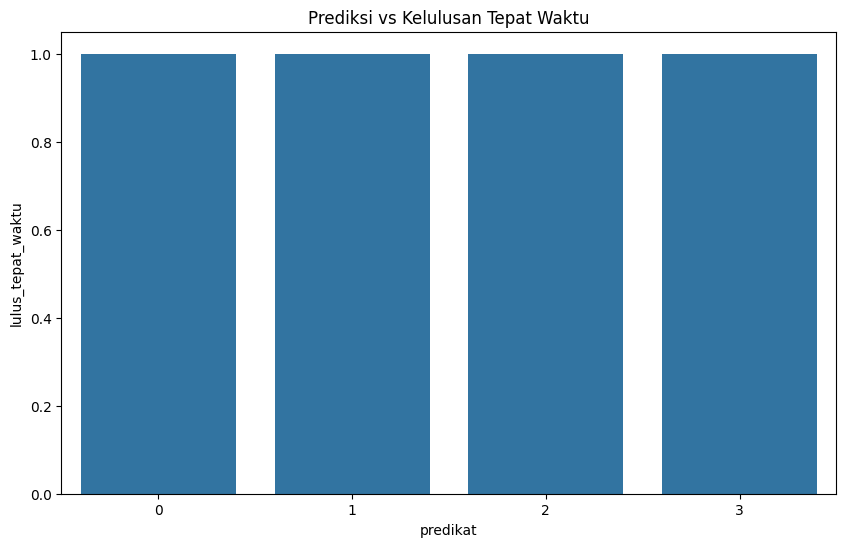

In [31]:
# Bar chart kehadiran vs kelulusan tepat waktu
plt.figure(figsize=(10, 6))
sns.barplot(x='predikat', y='lulus_tepat_waktu', data=df_merge_normalisasi)
plt.title('Prediksi vs Kelulusan Tepat Waktu')
plt.show()

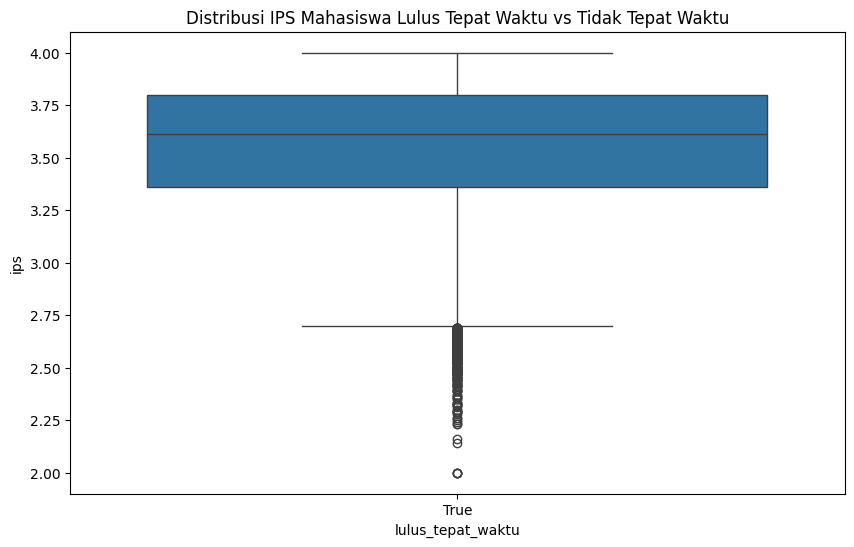

In [32]:
# Box plot IPK mahasiswa lulus tepat waktu vs tidak
plt.figure(figsize=(10, 6))
sns.boxplot(x='lulus_tepat_waktu', y='ips', data=df_merge_normalisasi)
plt.title('Distribusi IPS Mahasiswa Lulus Tepat Waktu vs Tidak Tepat Waktu')
plt.show()



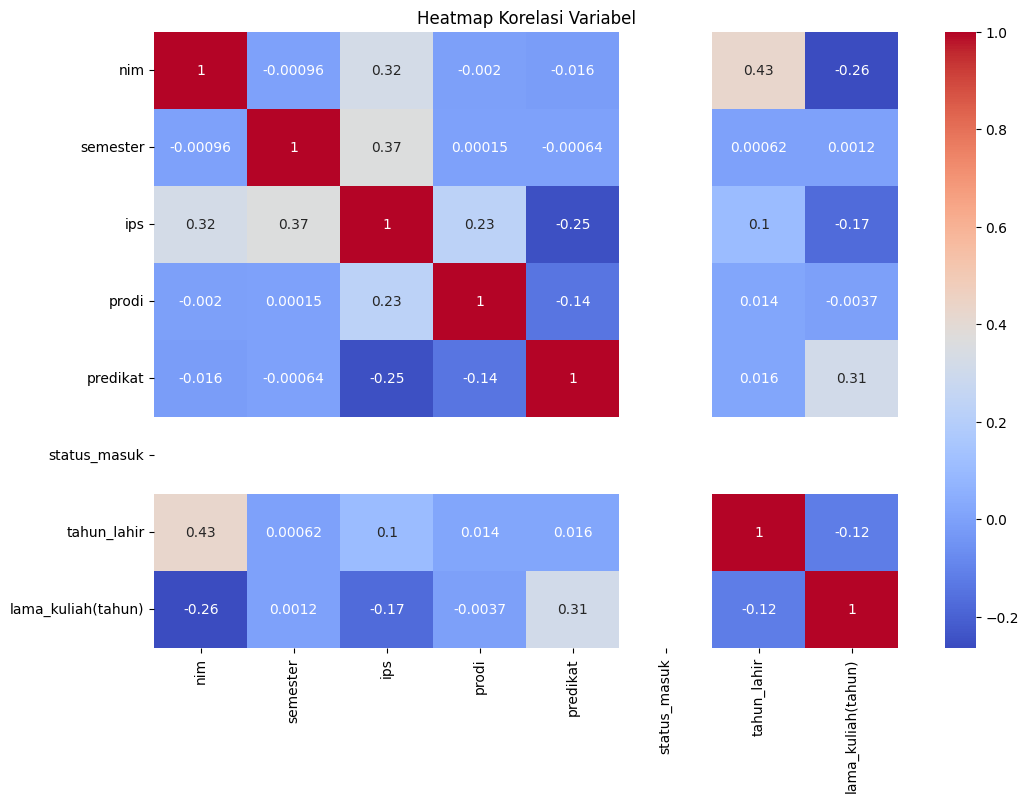

In [33]:
# Heatmap korelasi variabel-variabel terhadap kelulusan tepat waktu
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Variabel')
plt.show()